In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Regular expressions
import re

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Datasets\XYZCorp_LendingData.txt',delimiter="\t", low_memory=False)

In [4]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0000,5000.0000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0.0000,Jan-1985,1.0000,nan,nan,3.0000,0.0000,13648.0000,83.7000,9.0000,f,0.0000,0.0000,5861.0714,5831.7800,5000.0000,861.0700,0.0000,0.0000,0.0000,Jan-2015,171.6200,NaN,Jan-2016,0.0000,nan,1.0000,INDIVIDUAL,nan,nan,NaN,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0
1,1077430,1314167,2500.0000,2500.0000,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0.0000,Apr-1999,5.0000,nan,nan,3.0000,0.0000,1687.0000,9.4000,4.0000,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-2013,119.6600,NaN,Sep-2013,0.0000,nan,1.0000,INDIVIDUAL,nan,nan,NaN,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1


In [4]:
df.shape

(855969, 73)

In [5]:
df.duplicated()
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(855969, 73)

In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,416157.0000,131184.0000,855969.0000,855969.0000,855969.0000,855523.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855969.0000,855913.0000,213139.0000,855969.0000,442.0000,440.0000,855969.0000,788656.0000,788656.0000,13288.0000,13288.0000,13288.0000,13288.0000,12934.0000,13288.0000,11609.0000,13288.0000,13288.0000,13288.0000,13288.0000,788656.0000,13288.0000,13288.0000,13288.0000,855969.0000
mean,32240726.2861,34762690.0420,14745.5713,14732.3783,14700.0612,13.1923,436.2381,75071.1860,18.1222,0.3116,0.6809,34.1499,70.4640,11.5424,0.1945,16910.5270,55.0194,25.2693,8284.8302,8281.4493,7653.2963,7622.2205,5850.8411,1755.0462,0.3195,47.0895,4.9512,2225.9853,0.0142,44.1015,1.0000,107412.1640,18.3185,0.0049,225.4129,139766.2475,1.0730,2.9457,0.7493,1.6668,20.8332,36511.5414,71.4870,1.3543,2.9455,5840.4433,61.0245,32163.5745,0.9478,1.5242,1.8420,0.0543
std,22719691.5658,23994176.7968,8425.3400,8419.4717,8425.8055,4.3684,243.7269,64264.4698,17.4236,0.8572,0.9640,21.8685,27.8271,5.3081,0.5816,22223.7416,23.8116,11.8188,8461.9467,8458.4964,7909.3836,7885.1564,6676.4109,2081.6930,3.6094,413.1360,62.4786,4864.9666,0.1337,22.1649,0.0000,47987.6086,7.2219,0.0773,10489.4459,153938.5326,1.2069,3.0803,0.9862,1.6854,26.7392,42492.7578,23.0153,1.4837,2.5953,5108.5003,20.0181,37699.6379,1.4417,2.6976,2.9750,0.2266
min,54734.0000,70699.0000,500.0000,500.0000,0.0000,5.3200,15.6900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,17950.0000,3.0500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-4.0000,0.0000
25%,9067986.0000,10792732.0000,8000.0000,8000.0000,8000.0000,9.9900,260.5500,45000.0000,11.8800,0.0000,0.0000,15.0000,51.0000,8.0000,0.0000,6469.0000,37.6000,17.0000,0.0000,0.0000,1969.6900,1960.1200,1239.9500,451.2700,0.0000,0.0000,0.0000,285.4200,0.0000,27.0000,1.0000,75000.2500,13.1875,0.0000,0.0000,29870.0000,0.0000,1.0000,0.0000,0.0000,6.0000,10390.2500,58.5000,0.0000,1.0000,2405.0000,47.9000,14000.0000,0.0000,0.0000,0.0000,0.0000
50%,34313546.0000,36975319.0000,13000.0000,13000.0000,13000.0000,12.9900,382.5500,65000.0000,17.6100,0.0000,0.0000,31.0000,70.0000,11.0000,0.0000,11903.0000,55.9000,24.0000,6290.2500,6287.6500,4976.1600,4948.2500,3286.8900,1076.9100,0.0000,0.0000,0.0000,468.8200,0.0000,44.0000,1.0000,100000.0000,17.7350,0.0000,0.0000,81008.5000,1.0000,2.0000,0.0000,1.0000,12.0000,24959.5000,75.0000,1.0000,2.0000,4485.5000,62.1000,23800.0000,0.0000,0.0000,2.0000,0.0000
75%,54463114.0000,58035586.0000,20000.0000,20000.0000,20000.0000,15.9900,571.5600,90000.0000,23.9000,0.0000,1.0000,50.0000,92.0000,14.0000,0.0000,20857.0000,73.5000,32.0000,13528.8000,13522.5100,10744.8036,10697.3300,8000.0000,2233.9800,0.0000,0.0000,0.0000,849.1600,0.0000,61.0000,1.0000,130750.0000,22.6500,0.0000,0.0000,208703.2500,2.0000,4.0000,1.0000,2.0000,23.0000,47493.0000,87.5000,2.0000,4.0000,7701.2500,75.3000,39900.0000,1.0000,2.0000,3.0000,0.0000
max,68616867.0000,73519693.0000,35000.00

In [6]:
df['default_ind'].value_counts()
#94% have not defaulted
#6% are defaulters or charged off

0    809502
1     46467
Name: default_ind, dtype: int64

In [10]:
df_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})
df_null

,Count,Percent
id,0,0.0000
member_id,0,0.0000
loan_amnt,0,0.0000
funded_amnt,0,0.0000
funded_amnt_inv,0,0.0000
term,0,0.0000
int_rate,0,0.0000
installment,0,0.0000
grade,0,0.0000
sub_grade,0,0.0000


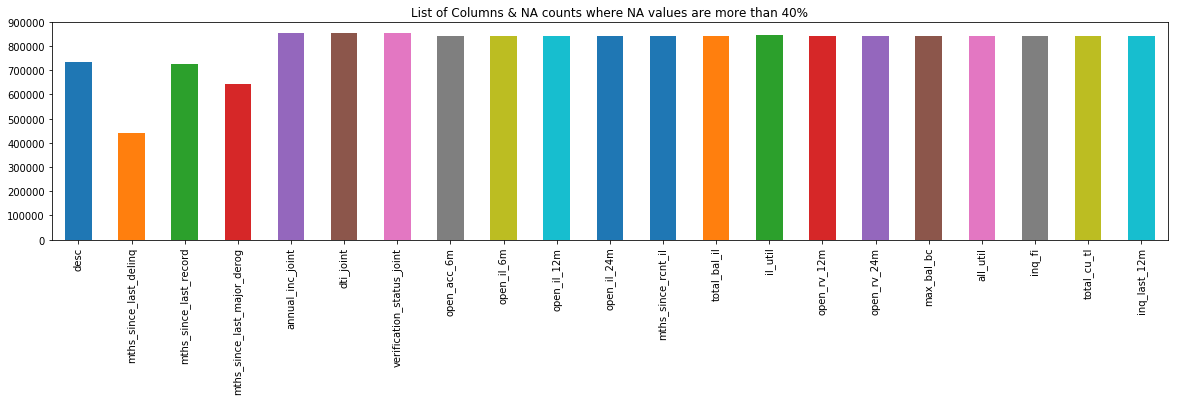

In [11]:
NA_col = df.isnull().sum()
NA_col = NA_col[NA_col.values >(0.4*len(df))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 40%')
plt.show()

Insights: So we can see from the above plot that there are 20+ columns in the dataset where all the values are NA.

As we can see there are 855969 observations & 73 columns in the dataset, it will be very difficult to look at each column one by one & find the NA or missing values. So let's find out all columns where missing values are more than certain percentage, let's say 40%. We will remove those columns as it is not feasable to impute missing values for those columns.

In [3]:
df.dropna(axis=1, thresh=0.4*len(df), inplace=True)
df.shape

(855969, 53)

Out of 73 features we only kept 53. So we removed about 21 features that had more than 50% missing values which will make any sense to our variation

Remove columns where number of unique value is only 1.

Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [4]:
unique = df.nunique()
unique = unique[unique.values == 1]
unique
# That unique value is policy_code

policy_code    1
dtype: int64

In [5]:
df.drop(labels = list(unique.index), axis =1, inplace=True)

In [6]:
print("So now we are left with",df.shape ,"rows & columns.")

So now we are left with (855969, 52) rows & columns.


In [7]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [8]:
# Transformation of special characters:

print('Transform: term...')
df['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
df['term'] = pd.to_numeric(df['term'], errors='coerce')

print('Transform: emp_length...')
df['emp_length'].replace('n/a', '0', inplace=True)
df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')


print('Transform: grade...')
df['grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
df['grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
df['grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
df['grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
df['grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
df['grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
df['grade'].replace(to_replace='G', value='6', regex=True, inplace=True)

print('Transform done.')

Transform: term...
Transform: emp_length...
Transform: grade...
Transform done.


In [16]:
# WE will remove the variables with very low variance except our "Target" variable..
var_df = df.var()
var_df[var_df<1]

delinq_2yrs                  0.7348
inq_last_6mths               0.9294
pub_rec                      0.3382
collections_12_mths_ex_med   0.0179
acc_now_delinq               0.0060
default_ind                  0.0513
dtype: float64

#We are removing low variance variables(excluding out target). However, since this is a sensitive problem we will remove based on our own discretion and business knowledge. some irrelevant columns Unique ID's such as "id","member_id". As last 2 digits of zip code is masked 'xx', we can remove that as well.

In [9]:
not_required_columns = ["id","member_id","zip_code","delinq_2yrs","inq_last_6mths","pub_rec","collections_12_mths_ex_med","acc_now_delinq"]
df.drop(labels = not_required_columns, axis =1, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

So now we are left with (855969, 44) rows & columns.


In [10]:
cat_columns= df.select_dtypes(include=['O']).columns
cat_columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'title',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [11]:
numeric_columns= df.select_dtypes(include=['float64']).columns
numeric_columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [12]:
Int_columns=df.select_dtypes(include=['int64']).columns
Int_columns

Index(['term', 'default_ind'], dtype='object')

In [13]:
# Removing irrelevant columns that has too much noise..
df.drop(['mths_since_last_delinq','next_pymnt_d','last_pymnt_d','emp_title','title','last_pymnt_d','next_pymnt_d','last_credit_pull_d','sub_grade'],axis=1,inplace=True)

In [14]:
#Finding the null values with the rest of the features. It is observed the 5 more features have null values. We will impute the null values as they might be important variables.
df.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                 43061
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
addr_state                     0
dti                            0
earliest_cr_line               0
open_acc                       0
revol_bal                      0
revol_util                   446
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection

Purpose of loan : Drop records where values are less than 0.75%

We will analyse only those categories which contain more than 0.75% of records. Also, we are not aware what comes under 'Other' we will remove this category as well.

In [15]:
df.purpose.value_counts()
(df.purpose.value_counts()*100)/len(df)

debt_consolidation   59.0433
credit_card          23.3822
home_improvement      5.8362
other                 4.7839
major_purchase        1.9378
small_business        1.1431
car                   1.0039
medical               0.9572
moving                0.6028
vacation              0.5306
house                 0.4104
wedding               0.2664
renewable_energy      0.0641
educational           0.0381
Name: purpose, dtype: float64

In [16]:
del_df_purpose = (df.purpose.value_counts()*100)/len(df)
del_df_purpose = del_df_purpose[(del_df_purpose < 0.75) | (del_df_purpose.index == 'other')]

In [17]:
df.drop(labels = df[df.purpose.isin(del_df_purpose.index)].index, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

print(df.purpose.unique())

So now we are left with (798650, 37) rows & columns.
['credit_card' 'car' 'small_business' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical']


In [18]:
new_categories= df.select_dtypes(include=['O']).columns
new_categories

Index(['grade', 'home_ownership', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'application_type'],
      dtype='object')

In [19]:
for col in new_categories:
    if df[col].unique().size>7:
        print(col)

issue_d
addr_state
earliest_cr_line


We are dropping columns that has more than 7 levels since it is not feasible to one hot encode them. Also, we're not removing issue_d because the variable need to be used for splitting

In [20]:
df.drop(['earliest_cr_line','addr_state'],axis=1,inplace=True)

In [21]:
#Revol_util will involve a median value imputation.
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

#tot_coll_amt will involve a median value imputation. I think regression imputation might work better but since this is initial stuff we will keep it simple.
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(df['tot_coll_amt'].median())

#tot_cur_bal will be fixed in similar manner.
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].median())

#total_rev_hi_lim will also contain median imputation
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median())


df['emp_length'] = np.where(df['emp_length'].isnull(), 0, df['emp_length'])

In [22]:
df.isnull().sum() # Finally there are no null values in our dataset

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
dti                        0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
application_type           0
tot_coll_amt               0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind   

In [23]:
df_new = df.copy()

In [24]:
df_new.shape

(798650, 35)

In [25]:
#mapping the issue date from "Jun-2015" to "Dec-2015" as Test for the ease of splitting our data to test set.
mapping_dict = {
"issue_d": {"Jun-2015":"Test","Jul-2015":"Test","Aug-2015":"Test","Sep-2015":"Test","Oct-2015":"Test","Nov-2015":"Test","Dec-2015":"Test"}
}
df_new = df_new.replace(mapping_dict)
df_new['issue_d'].head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
6    Dec-2011
7    Dec-2011
Name: issue_d, dtype: object

In [26]:
df_new['issue_d'].unique() #checking for "Test" value in the feature

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Sep-2007', 'Aug-2007', 'Jul-2007', 'Jun-2007',
       'Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'May-20

In [36]:
#1. Loan amount to Annual Income ratio
df_new['loan_income_ratio']= df_new['loan_amnt']/df_new['annual_inc']

In [37]:
#2. Extract Year & Month from Issue date

df_new['issue_month'],df_new['issue_year'] = df_new['issue_d'].str.split('-', 1).str
df_new[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-2011,Dec,2011
1,Dec-2011,Dec,2011
2,Dec-2011,Dec,2011
6,Dec-2011,Dec,2011
7,Dec-2011,Dec,2011


In [38]:
#3. Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df_new['issue_month'] = pd.Categorical(df_new['issue_month'],categories=months_order, ordered=True)

In [39]:
#4. Create Bins for range of Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df_new['loan_amnt_range'] = pd.cut(df_new['loan_amnt'], bins, labels=slot)

In [40]:
#6. Create Bins for range of Interest rates¶
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
df_new['int_rate_range'] = pd.cut(df_new['int_rate'], bins, labels=slot)

In [41]:
def univariate(df_new,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df_new      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df_new[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df_new, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df_new, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df_new[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df_new, x= col, order=df_new[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

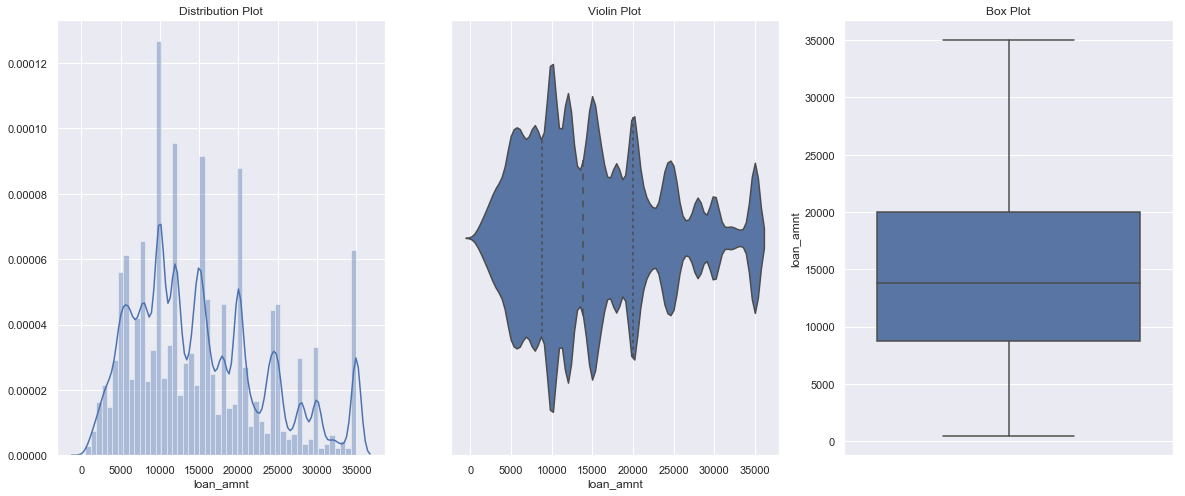

In [42]:
#1) Loan amount
univariate(df_new,col='loan_amnt',vartype=0)

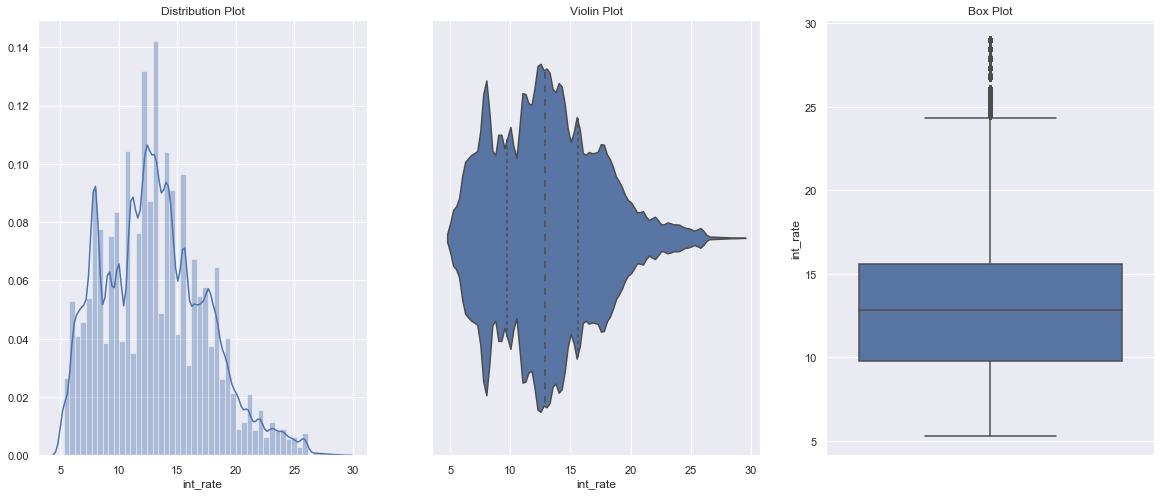

In [43]:
#2. Interest Rate
univariate(df_new,col='int_rate',vartype=0)

In [44]:
df_new["annual_inc"].describe()
#Max value is 9500000 which is approx 150 times more than mean value, so we will remove the outliers from Annual Income.¶
#Remove Outliers (values from 99 to 100%)

count    798650.0000
mean      75432.3691
std       64929.1708
min           0.0000
25%       46000.0000
50%       65000.0000
75%       90000.0000
max     9500000.0000
Name: annual_inc, dtype: float64

In [45]:
q = df_new["annual_inc"].quantile(0.995)
loan = df_new[df_new["annual_inc"] < q]
loan["annual_inc"].describe()

count   793700.0000
mean     72968.6576
std      39044.3964
min          0.0000
25%      46000.0000
50%      65000.0000
75%      90000.0000
max     299999.0000
Name: annual_inc, dtype: float64

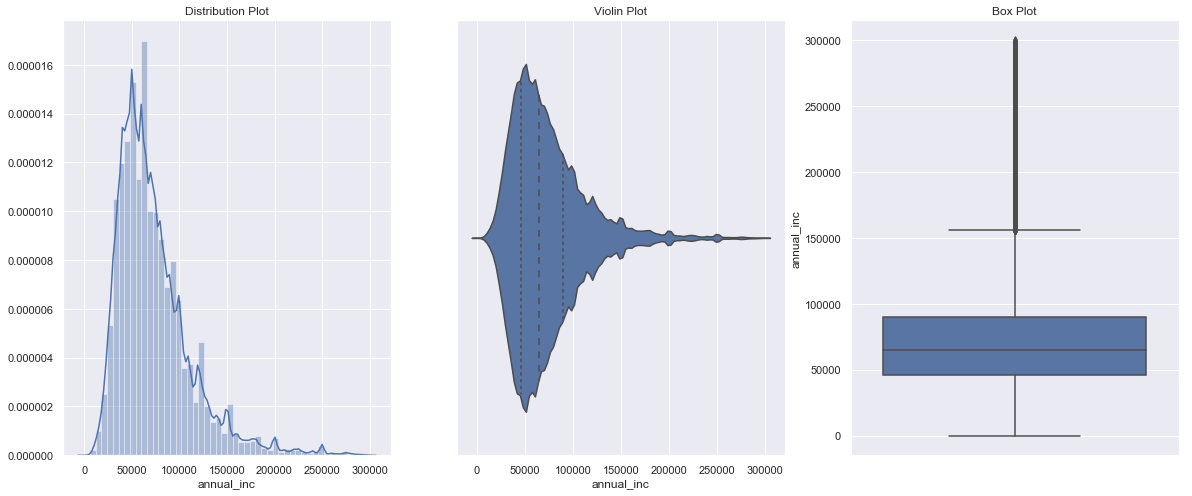

In [46]:
univariate(loan,col='annual_inc',vartype=0)

## Insights: Most of the applicants earns beteen 40000 to 90000 USD annually.

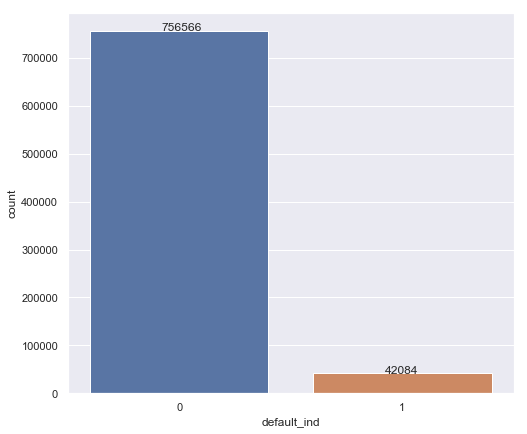

In [47]:
univariate(df_new,col='default_ind',vartype=1)

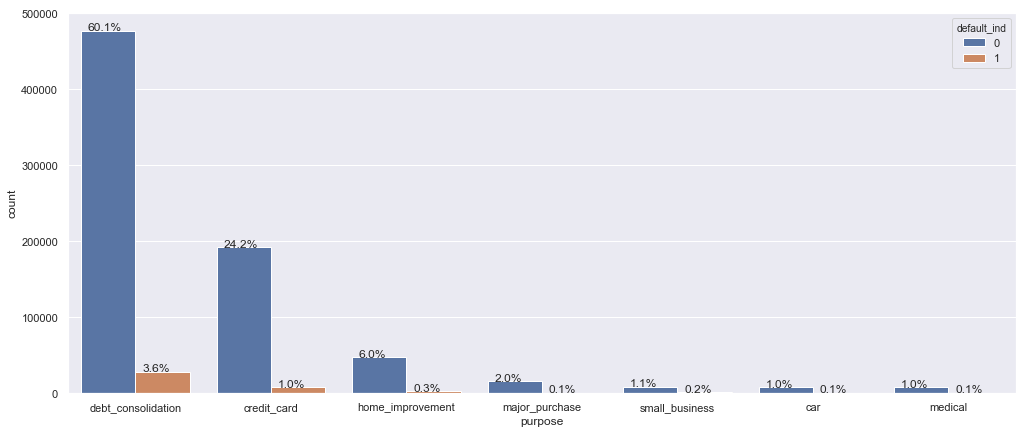

In [48]:
#5. Purpose of loan
univariate(df_new,col='purpose',vartype=1,hue='default_ind')

In [49]:
#6. Home Ownership wise Loan
df_new.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [50]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
df_new.drop(df_new[df_new['home_ownership'].isin(rem)].index,inplace=True)
df_new.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

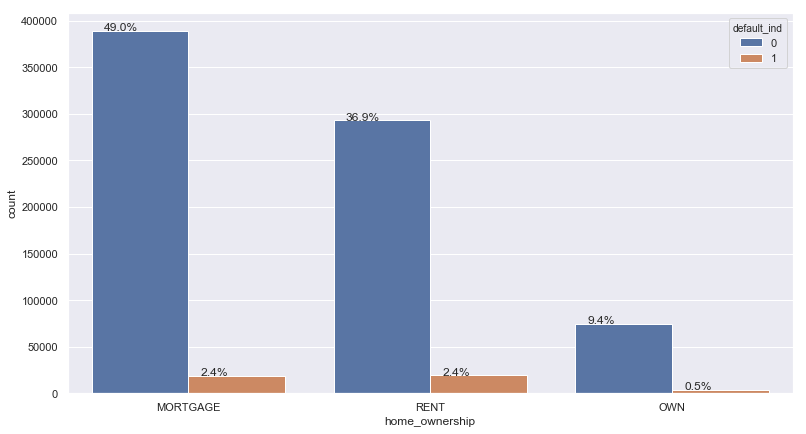

In [51]:
univariate(df_new,col='home_ownership',vartype=1,hue='default_ind')
# Insights: 40% of applicants are living in rented home whereas 52% applicants were mortagaged their home.

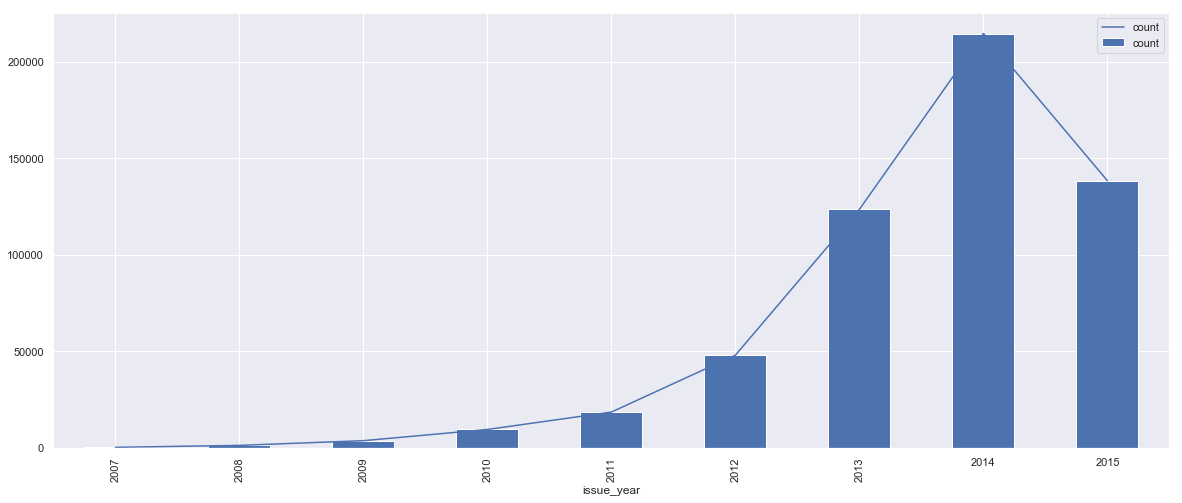

In [52]:
#7. Year wise Loan
year_wise =df_new.groupby(by= [df_new.issue_year])[['default_ind']].count()
year_wise.rename(columns={"default_ind": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

In [27]:
loan_correlation = df_new.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
loan_amnt,1.0000,0.9993,0.9977,0.4045,0.1651,0.9424,0.1248,0.3326,0.0194,0.1954,0.3450,0.1250,0.2196,0.6353,0.6353,0.4690,0.4697,0.3847,0.5324,0.0288,0.0746,0.0551,0.2260,-0.0171,0.3256,0.3180,-0.0020
funded_amnt,0.9993,1.0000,0.9986,0.4036,0.1652,0.9434,0.1249,0.3324,0.0197,0.1959,0.3449,0.1255,0.2195,0.6372,0.6372,0.4677,0.4685,0.3835,0.5313,0.0284,0.0741,0.0549,0.2255,-0.0170,0.3263,0.3186,-0.0029
funded_amnt_inv,0.9977,0.9986,1.0000,0.4039,0.1652,0.9418,0.1256,0.3318,0.0205,0.1964,0.3443,0.1260,0.2197,0.6394,0.6394,0.4643,0.4679,0.3801,0.5293,0.0260,0.0729,0.0533,0.2245,-0.0167,0.3270,0.3189,-0.0051
term,0.4045,0.4036,0.4039,1.0000,0.4444,0.1290,0.0823,0.0552,0.0499,0.0834,0.0928,0.0879,0.0992,0.3884,0.3883,0.0734,0.0744,-0.0347,0.3791,0.0032,0.0577,0.0376,0.0685,-0.0071,0.1084,0.0640,0.0313
int_rate,0.1651,0.1652,0.1652,0.4444,1.0000,0.1477,0.0130,-0.0732,0.0808,-0.0042,-0.0313,0.2819,-0.0324,0.0449,0.0447,0.1859,0.1868,0.0691,0.4623,0.0522,0.1125,0.0763,0.1129,0.0042,-0.0801,-0.1613,0.1561
installment,0.9424,0.9434,0.9418,0.1290,0.1477,1.0000,0.1064,0.3253,0.0132,0.1804,0.3266,0.1381,0.1973,0.5314,0.5314,0.5121,0.5128,0.4471,0.4953,0.0388,0.0761,0.0571,0.2362,-0.0147,0.2944,0.2915,0.0080
emp_length,0.1248,0.1249,0.1256,0.0823,0.0130,0.1064,1.0000,0.0868,0.0083,0.0514,0.0906,0.0384,0.0987,0.0764,0.0764,0.0692,0.0703,0.0556,0.0832,-0.0047,0.0068,0.0049,0.0400,0.0031,0.1129,0.0786,-0.0135
annual_inc,0.3326,0.3324,0.3318,0.0552,-0.0732,0.3253,0.0868,1.0000,-0.0848,0.1368,0.2974,0.0350,0.1845,0.2087,0.2088,0.1574,0.1574,0.1469,0.1248,0.0113,0.0071,0.0065,0.0886,0.0017,0.4058,0.2710,-0.0358
dti,0.0194,0.0197,0.0205,0.0499,0.0808,0.0132,0.0083,-0.0848,1.0000,0.1361,0.0643,0.0802,0.1012,0.0554,0.0554,-0.0389,-0.0380,-0.0490,0.0094,-0.0052,0.0021,0.0031,-0.0275,-0.0058,-0.0030,0.0356,0.0053
open_acc,0.1954,0.1959,0.1964,0.0834,-0.0042,0.1804,0.0514,0.1368,0.1361,1.0000,0.2257,-0.1560,0.6943,0.1667,0.1667,0.0408,0.0418,0.0298,0.0591,-0.0080,0.0019,0.0042,0.0275,0.0067,0.2432,0.3341,-0.0195


In [28]:
df_new._get_numeric_data().head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0000,5000.0000,4975.0000,36,10.6500,162.8700,10.0000,24000.0000,27.6500,3.0000,13648.0000,83.7000,9.0000,0.0000,0.0000,5861.0714,5831.7800,5000.0000,861.0700,0.0000,0.0000,0.0000,171.6200,0.0000,84121.0000,24200.0000,0
1,2500.0000,2500.0000,2500.0000,60,15.2700,59.8300,0.0000,30000.0000,1.0000,3.0000,1687.0000,9.4000,4.0000,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,119.6600,0.0000,84121.0000,24200.0000,1
2,2400.0000,2400.0000,2400.0000,36,15.9600,84.3300,10.0000,12252.0000,8.7200,2.0000,2956.0000,98.5000,10.0000,0.0000,0.0000,3003.6536,3003.6500,2400.0000,603.6500,0.0000,0.0000,0.0000,649.9100,0.0000,84121.0000,24200.0000,0
6,7000.0000,7000.0000,7000.0000,60,15.9600,170.0800,8.0000,47004.0000,23.5100,7.0000,17726.0000,85.6000,11.0000,1889.1500,1889.1500,8136.8400,8136.8400,5110.8500,3025.9900,0.0000,0.0000,0.0000,170.0800,0.0000,84121.0000,24200.0000,0
7,3000.0000,3000.0000,3000.0000,36,18.6400,109.4300,9.0000,48000.0000,5.3500,4.0000,8221.0000,87.5000,4.0000,0.0000,0.0000,3938.1443,3938.1400,3000.0000,938.1400,0.0000,0.0000,0.0000,111.3400,0.0000,84121.0000,24200.0000,0


In [24]:
#We are dropping the variables that we added for our analysis because there are already many features with much information.
df_new.drop(['issue_month','issue_year','int_rate_range','loan_amnt_range'],axis=1,inplace=True)

In [55]:
df_new['loan_income_ratio'] = np.where(df_new['loan_income_ratio'].isnull(), 0, df_new['loan_income_ratio'])

In [70]:
df_new.replace([np.inf, -np.inf], np.nan).dropna(subset=["loan_income_ratio"], how="all")

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,loan_income_ratio
0,5000.0000,5000.0000,4975.0000,36,10.6500,162.8700,1,10.0000,RENT,24000.0000,Verified,Dec-2011,n,credit_card,27.6500,3.0000,13648.0000,83.7000,9.0000,f,0.0000,0.0000,5861.0714,5831.7800,5000.0000,861.0700,0.0000,0.0000,0.0000,171.6200,INDIVIDUAL,0.0000,84121.0000,24200.0000,0,0.2083
1,2500.0000,2500.0000,2500.0000,60,15.2700,59.8300,2,0.0000,RENT,30000.0000,Source Verified,Dec-2011,n,car,1.0000,3.0000,1687.0000,9.4000,4.0000,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,119.6600,INDIVIDUAL,0.0000,84121.0000,24200.0000,1,0.0833
2,2400.0000,2400.0000,2400.0000,36,15.9600,84.3300,2,10.0000,RENT,12252.0000,Not Verified,Dec-2011,n,small_business,8.7200,2.0000,2956.0000,98.5000,10.0000,f,0.0000,0.0000,3003.6536,3003.6500,2400.0000,603.6500,0.0000,0.0000,0.0000,649.9100,INDIVIDUAL,0.0000,84121.0000,24200.0000,0,0.1959
6,7000.0000,7000.0000,7000.0000,60,15.9600,170.0800,2,8.0000,RENT,47004.0000,Not Verified,Dec-2011,n,debt_consolidation,23.5100,7.0000,17726.0000,85.6000,11.0000,f,1889.1500,1889.1500,8136.8400,8136.8400,5110.8500,3025.9900,0.0000,0.0000,0.0000,170.0800,INDIVIDUAL,0.0000,84121.0000,24200.0000,0,0.1489
7,3000.0000,3000.0000,3000.0000,36,18.6400,109.4300,4,9.0000,RENT,48000.0000,Source Verified,Dec-2011,n,car,5.3500,4.0000,8221.0000,87.5000,4.0000,f,0.0000,0.0000,3938.1443,3938.1400,3000.0000,938.1400,0.0000,0.0000,0.0000,111.3400,INDIVIDUAL,0.0000,84121.0000,24200.0000,0,0.0625
8,5600.0000,5600.0000,5600.0000,60,21.2800,152.3900,5,4.0000,OWN,40000.0000,Source Verified,Dec-2011,n,small_business,5.5500,11.0000,5210.0000,32.6000,13.0000,f,0.0000,0.0000,646.0200,646.0200,162.0200,294.9400,0.0000,189.0600,2.0900,152.3900,INDIVIDUAL,0.0000,84121.0000,24200.0000,1,0.1400
10,6500.0000,6500.0000,6500.0000,60,14.6500,153.4500,2,5.0000,OWN,72000.0000,Not Verified,Dec-2011,n,debt_consolidation,16.1200,14.0000,4032.0000,20.6000,23.0000,f,0.0000,0.0000,7677.5200,7677.5200,6500.0000,1177.5200,0.0000,0.0000,0.0000,1655.5400,INDIVIDUAL,0.0000,84121.0000,24200.0000,0,0.0903
11,12000.0000,12000.0000,12000.0000,36,12.6900,402.5400,1,10.0000,OWN,75000.0000,Source Verified,Dec-2011,n,debt_consolidation,10.7800,12.0000,23336.0000,67.1000,34.0000,f,0.0000,0.0000,13943.0800,13943.0800,12000.0000,1943.0800,0.0000,0.0000,0.0000,6315.3000,INDIVIDUAL,0.0000,84121.0000,24200.0000,0,0.1600
12,9000.0000,9000.0000,9000.0000,36,13.4900,305.3800,2,0.0000,RENT,30000.0000,Source Verified,Dec-2011,n,debt_consolidation,10.0800,4.0000,10452.0000,91.7000,9.0000,f,0.0000,0.0000,2270.7000,2270.7000,1256.1400,570.2600,0.0000,444.3000,4.1600,305.3800,INDIVIDUAL,0.0000,84121.0000,24200.0000,1,0.3000
13,3000.0000,3000.0000,3000.0000,36,9.9100,96.6800,1,3.0000,RENT,15000.0000,Source Verified,Dec-2011,n,credit_card,12.5600,11.0000,7323.0000,43.1000,11.0000,f,0.0000,0.0000,3478.9819,3478.9800,3000.0000,478.9800,0.0000,0.0000,0.0000,102.4300,INDIVIDUAL,0.0000,84121.0000,24200.0000,0,0.2000


In [69]:
df_new.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
pymnt_plan                 0
purpose                    0
dti                        0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
application_type           0
tot_coll_amt               0
tot_cur_bal                0
total_rev_hi_lim           0
default_ind   

In [29]:
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti','total_pymnt','total_pymnt_inv','total_rec_prncp']

df_new[numeric_columns] = df_new[numeric_columns].apply(pd.to_numeric)

In [30]:
loan_correlation = df_new[numeric_columns].corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_pymnt,total_pymnt_inv,total_rec_prncp
loan_amnt,1.0000,0.9993,0.9977,0.9424,0.1651,0.3326,0.0194,0.4690,0.4697,0.3847
funded_amnt,0.9993,1.0000,0.9986,0.9434,0.1652,0.3324,0.0197,0.4677,0.4685,0.3835
funded_amnt_inv,0.9977,0.9986,1.0000,0.9418,0.1652,0.3318,0.0205,0.4643,0.4679,0.3801
installment,0.9424,0.9434,0.9418,1.0000,0.1477,0.3253,0.0132,0.5121,0.5128,0.4471
int_rate,0.1651,0.1652,0.1652,0.1477,1.0000,-0.0732,0.0808,0.1859,0.1868,0.0691
annual_inc,0.3326,0.3324,0.3318,0.3253,-0.0732,1.0000,-0.0848,0.1574,0.1574,0.1469
dti,0.0194,0.0197,0.0205,0.0132,0.0808,-0.0848,1.0000,-0.0389,-0.0380,-0.0490
total_pymnt,0.4690,0.4677,0.4643,0.5121,0.1859,0.1574,-0.0389,1.0000,0.9983,0.9705
total_pymnt_inv,0.4697,0.4685,0.4679,0.5128,0.1868,0.1574,-0.0380,0.9983,1.0000,0.9687
total_rec_prncp,0.3847,0.3835,0.3801,0.4471,0.0691,0.1469,-0.0490,0.9705,0.9687,1.0000


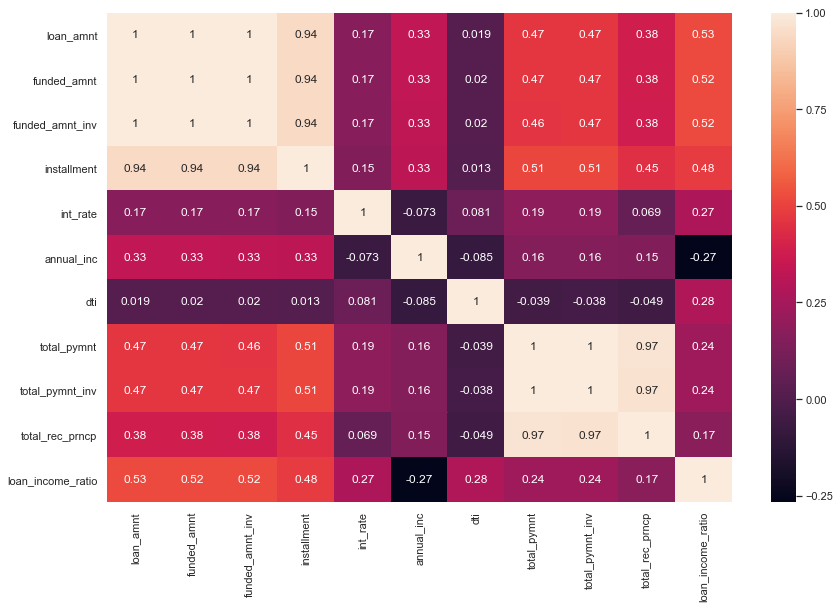

In [77]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [31]:
Final=df_new.copy()

In [32]:
Final['grade'] = Final['grade'].apply(pd.to_numeric)

In [33]:
categories_col = Final.select_dtypes(include=['object'])
categories_col

,home_ownership,verification_status,issue_d,pymnt_plan,purpose,initial_list_status,application_type
0,RENT,Verified,Dec-2011,n,credit_card,f,INDIVIDUAL
1,RENT,Source Verified,Dec-2011,n,car,f,INDIVIDUAL
2,RENT,Not Verified,Dec-2011,n,small_business,f,INDIVIDUAL
6,RENT,Not Verified,Dec-2011,n,debt_consolidation,f,INDIVIDUAL
7,RENT,Source Verified,Dec-2011,n,car,f,INDIVIDUAL
8,OWN,Source Verified,Dec-2011,n,small_business,f,INDIVIDUAL
10,OWN,Not Verified,Dec-2011,n,debt_consolidation,f,INDIVIDUAL
11,OWN,Source Verified,Dec-2011,n,debt_consolidation,f,INDIVIDUAL
12,RENT,Source Verified,Dec-2011,n,debt_consolidation,f,INDIVIDUAL
13,RENT,Source Verified,Dec-2011,n,credit_card,f,INDIVIDUAL


In [34]:
Final.drop(['pymnt_plan','initial_list_status'],axis=1,inplace=True)

In [35]:
Final.select_dtypes(include=['object'])

,home_ownership,verification_status,issue_d,purpose,application_type
0,RENT,Verified,Dec-2011,credit_card,INDIVIDUAL
1,RENT,Source Verified,Dec-2011,car,INDIVIDUAL
2,RENT,Not Verified,Dec-2011,small_business,INDIVIDUAL
6,RENT,Not Verified,Dec-2011,debt_consolidation,INDIVIDUAL
7,RENT,Source Verified,Dec-2011,car,INDIVIDUAL
8,OWN,Source Verified,Dec-2011,small_business,INDIVIDUAL
10,OWN,Not Verified,Dec-2011,debt_consolidation,INDIVIDUAL
11,OWN,Source Verified,Dec-2011,debt_consolidation,INDIVIDUAL
12,RENT,Source Verified,Dec-2011,debt_consolidation,INDIVIDUAL
13,RENT,Source Verified,Dec-2011,credit_card,INDIVIDUAL


In [36]:
Final.drop('issue_d',axis=1,inplace=True)

In [37]:
Split_var=pd.DataFrame(df_new['issue_d'])

In [38]:
Split_var.head()

,issue_d
0,Dec-2011
1,Dec-2011
2,Dec-2011
6,Dec-2011
7,Dec-2011


In [39]:
original_cat = Final.select_dtypes(include=['object'])
original_cat

,home_ownership,verification_status,purpose,application_type
0,RENT,Verified,credit_card,INDIVIDUAL
1,RENT,Source Verified,car,INDIVIDUAL
2,RENT,Not Verified,small_business,INDIVIDUAL
6,RENT,Not Verified,debt_consolidation,INDIVIDUAL
7,RENT,Source Verified,car,INDIVIDUAL
8,OWN,Source Verified,small_business,INDIVIDUAL
10,OWN,Not Verified,debt_consolidation,INDIVIDUAL
11,OWN,Source Verified,debt_consolidation,INDIVIDUAL
12,RENT,Source Verified,debt_consolidation,INDIVIDUAL
13,RENT,Source Verified,credit_card,INDIVIDUAL


In [41]:
dummy_df = pd.get_dummies(original_cat)
dummy_df.shape

(798650, 18)

In [42]:
from scipy.stats import boxcox

In [155]:
Final.drop('loan_income_ratio',axis=1,inplace=True)

In [43]:
#Box Cox transformation..
numerical = Final.columns[Final.dtypes == 'float64']
for i in numerical:
    if Final[i].min() > 0:
        transformed, lamb = boxcox(Final.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            Final.loc[df[i].notnull(), i] = transformed

In [44]:
Final.shape

(798650, 32)

In [45]:
Final = pd.concat([Final , dummy_df], axis=1)

In [46]:
Final.shape

(798650, 50)

In [47]:
nominal_columns = ["home_ownership", "verification_status", "purpose","application_type"]
nominal_columns

['home_ownership', 'verification_status', 'purpose', 'application_type']

In [48]:
Final = Final.drop(nominal_columns, axis=1)

In [49]:
Final.shape

(798650, 46)

In [50]:
Final = pd.concat([Final , Split_var], axis=1)

In [51]:
Final.shape

(798650, 47)

In [52]:
Train1 = Final.loc[Final['issue_d'] != "Test",:].drop('issue_d', axis = 1).copy()

Test1 = Final.loc[Final['issue_d'] == "Test",:].drop('issue_d', axis = 1).copy()

In [53]:
print(Train1.shape)
print(Test1.shape)

(557446, 46)
(241204, 46)


In [59]:
Train1.head()
Test1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_small_business,application_type_INDIVIDUAL,application_type_JOINT
0,135.8155,135.1099,25000.0000,36,2.3501,23.9517,0,1.0000,150000.0000,9.5400,7.0000,19339.0000,42.5000,5.0095,24357.9700,24357.9700,682.6700,682.6700,642.0300,40.6400,0.0000,0.0000,0.0000,701.1400,0.0000,430856.0000,45500.0000,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,118.9751,118.3815,18000.0000,60,5.5694,20.0924,4,7.0000,150000.0000,9.3900,18.0000,14052.0000,40.7000,6.2117,17820.5000,17820.5000,286.6400,286.6400,179.5000,107.1400,0.0000,0.0000,0.0000,335.3400,60.0000,36247.0000,34500.0000,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,81.1318,80.7744,7000.0000,36,3.0485,14.8836,0,10.0000,59000.0000,13.0600,10.0000,10467.0000,24.2000,6.9754,7000.0000,7000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,55222.0000,43200.0000,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,124.1401,123.5126,20000.0000,36,5.3187,23.5905,3,7.0000,180000.0000,25.1000,13.0000,59126.0000,92.1000,6.5531,20000.0000,20000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,418.0000,277227.0000,64200.0000,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,110.5299,109.9910,15000.0000,36,2.8999,19.9522,0,2.0000,93000.0000,14.8600,8.0000,14914.0000,43.2000,4.8534,15000.0000,15000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,306430.0000,34500.0000,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [56]:
Train1.reset_index(drop=True, inplace=True)
#We can use the drop parameter to avoid the old index being added as a column:

In [58]:
Test1.reset_index(drop=True, inplace=True)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [61]:
# Scaling the training set
Xunb = Train1.drop('default_ind', axis=1)
yunb = Train1['default_ind']
numerical = Xunb.columns[(Xunb.dtypes == 'float64') | (Xunb.dtypes == 'int64')].tolist()
Xunb[numerical] = sc.fit_transform(Xunb[numerical])

In [ ]:
# Scaling the testing set
Xte = Test1.drop('default_ind', axis=1)
yte = Test1['default_ind']
numerical = Xte.columns[(Xte.dtypes == 'float64') | (Xte.dtypes == 'int64')].tolist()
Xte[numerical] = sc.fit_transform(Xte[numerical])

In [100]:
print(Xunb.shape)
print(yunb.shape)
print(Xte.shape)
print(yte.shape)

(557446, 45)
(557446,)
(241204, 45)
(241204,)


In [101]:
random_seed=123

In [ ]:
##Model Building

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 1) LogisticRegression With class_weight='balanced' and solver='lbfgs'

In [102]:
LR = LogisticRegression(random_state=18, class_weight='balanced', solver='lbfgs')

In [103]:
LR.fit(Xunb, yunb)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=18,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [104]:
pred1 = LR1.predict(Xte)

In [106]:
accuracy_score(yte,pred1)

0.4075595761264324

# 2) LogisticRegression With class_weight='balanced',solver='saga',penalty='l1'

In [110]:
LR2 = LogisticRegression(random_state=18, class_weight='balanced',solver='saga',penalty='l1')

In [111]:
LR2.fit(Xunb, yunb)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=18,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [117]:
pred3 = LR2.predict(Xte)
predicted_df=pd.DataFrame(pred3)

In [118]:
accuracy_score(yte,predicted_df)

0.7540173463126648

With Solver='Saga' adn penalty='l1' our model scores a better permformance.

In [173]:
cols = ['Model','R-Squared value','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmpl = pd.Series({'Model': "Logistic Regression Base Model",
                
                  'ROC Score' : metrics.roc_auc_score(yte, predicted_df),
                  'Precision Score':metrics.precision_score(yte, predicted_df),
                  'Recall Score': metrics.recall_score(yte, predicted_df),
                  'Accuracy Score': metrics.accuracy_score(yte, predicted_df),
                  'Kappa Score': metrics.cohen_kappa_score(yte, predicted_df)})

In [174]:
tmpl

Model              Logistic Regression Base Model
ROC Score                                  0.8394
Precision Score                            0.0043
Recall Score                               0.9250
Accuracy Score                             0.7540
Kappa Score                                0.0064
dtype: object

In [120]:
print(classification_report(yte, predicted_df))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86    240924
           1       0.00      0.93      0.01       280

   micro avg       0.75      0.75      0.75    241204
   macro avg       0.50      0.84      0.43    241204
weighted avg       1.00      0.75      0.86    241204



In [121]:
m = yte.to_frame()
m['default_ind'].value_counts()

0    240924
1       280
Name: default_ind, dtype: int64

# Logistic Regression with Class_weight='balanced'

In [89]:
LR1 = LogisticRegression(C=0.05,random_state=18, class_weight='balanced', penalty='l2')

In [90]:
LR1.fit(Xunb, yunb)

LogisticRegression(C=0.05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=18,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [91]:
pred2 = LR1.predict(Xte)

In [92]:
accuracy_score(yte,pred2)

0.4075595761264324

# Sith Solver="Saga"

In [177]:
LR3 = LogisticRegression(random_state=18, solver='saga', multi_class='auto')

In [178]:
LR3.fit(Xunb, yunb)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=18, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [179]:
LR3_pred=LR3.predict(Xte)
LR3_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [180]:
accuracy_score(yte,LR3_pred)

0.9984245700734647

In [185]:
CM = confusion_matrix(yte,LR3_pred)
CM

array([[240606,    318],
       [    62,    218]], dtype=int64)

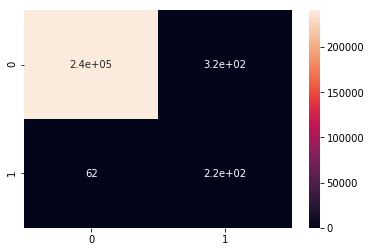

In [186]:
sns.heatmap(CM, annot= True)

In [187]:
cols = ['Model','R-Squared value','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmpl = pd.Series({'Model': "Logistic Regression Base Model",
                
                  'ROC Score' : metrics.roc_auc_score(yte, LR3_pred),
                  'Precision Score':metrics.precision_score(yte, LR3_pred),
                  'Recall Score': metrics.recall_score(yte, LR3_pred),
                  'Accuracy Score': metrics.accuracy_score(yte, LR3_pred),
                  'Kappa Score': metrics.cohen_kappa_score(yte, LR3_pred)})

In [188]:
tmpl

Model              Logistic Regression Base Model
ROC Score                                  0.8886
Precision Score                            0.4067
Recall Score                               0.7786
Accuracy Score                             0.9984
Kappa Score                                0.5336
dtype: object

In [ ]:
**********************************************************************

# Random Forest Classifier

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [123]:
#SET Model1
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)
clf.fit(Xunb, yunb)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [134]:
RF_pred = clf.predict(Xte)

In [135]:
accuracy_score(yte,RF_pred)

0.7772217707832374

In [190]:
CM1 = confusion_matrix(yte,RF_pred)
CM1

array([[187240,  53684],
       [    51,    229]], dtype=int64)

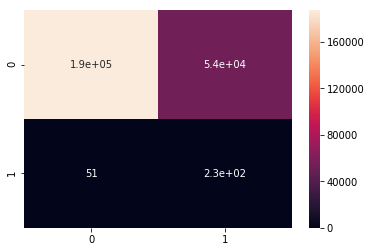

In [191]:
sns.heatmap(CM1, annot= True)

In [163]:
print(classification_report(yte, RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87    240924
           1       0.00      0.82      0.01       280

   micro avg       0.78      0.78      0.78    241204
   macro avg       0.50      0.80      0.44    241204
weighted avg       1.00      0.78      0.87    241204



In [192]:
cols = ['Model','R-Squared value','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmpl = pd.Series({'Model': "Logistic Regression Base Model",
                
                  'ROC Score' : metrics.roc_auc_score(yte, RF_pred),
                  'Precision Score':metrics.precision_score(yte, RF_pred),
                  'Recall Score': metrics.recall_score(yte, RF_pred),
                  'Accuracy Score': metrics.accuracy_score(yte, RF_pred),
                  'Kappa Score': metrics.cohen_kappa_score(yte, RF_pred)})

In [193]:
tmpl

Model              Logistic Regression Base Model
ROC Score                                  0.7975
Precision Score                            0.0042
Recall Score                               0.8179
Accuracy Score                             0.7772
Kappa Score                                0.0062
dtype: object

# Parameter Tuning 

In [136]:
# Set Model2
Model = RandomForestClassifier(n_estimators=200, random_state=0, max_depth=2, min_samples_split = 30)
Model.fit(Xunb, yunb)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [137]:
Model_pred = Model.predict(Xte)

In [138]:
accuracy_score(yte,Model_pred)

0.7806669872804762

In [159]:
print(classification_report(yte, Model_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88    240924
           1       0.00      0.82      0.01       280

   micro avg       0.78      0.78      0.78    241204
   macro avg       0.50      0.80      0.44    241204
weighted avg       1.00      0.78      0.88    241204



In [194]:
cols = ['Model','R-Squared value','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmpl = pd.Series({'Model': "Logistic Regression Base Model",
                
                  'ROC Score' : metrics.roc_auc_score(yte, Model_pred),
                  'Precision Score':metrics.precision_score(yte, Model_pred),
                  'Recall Score': metrics.recall_score(yte, Model_pred),
                  'Accuracy Score': metrics.accuracy_score(yte, Model_pred),
                  'Kappa Score': metrics.cohen_kappa_score(yte, Model_pred)})

In [195]:
tmpl

Model              Logistic Regression Base Model
ROC Score                                  0.7992
Precision Score                            0.0043
Recall Score                               0.8179
Accuracy Score                             0.7807
Kappa Score                                0.0063
dtype: object

In [ ]:
#****************************************************************************************************

In [146]:
# Set Model2
Model3 = RandomForestClassifier(n_estimators=200, random_state=0, max_depth=2, min_samples_split = 50)
Model3.fit(Xunb, yunb)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [147]:
pred = Model3.predict(Xte)

In [148]:
accuracy_score(yte,pred)

0.7806669872804762

In [197]:
cols = ['Model','R-Squared value','ROC Score','Precision Score','Recall Score','Accuracy Score','Kappa Score']
models_report = pd.DataFrame(columns = cols)
from sklearn import metrics
tmpl = pd.Series({'Model': "Logistic Regression Base Model",
                
                  'ROC Score' : metrics.roc_auc_score(yte, pred),
                  'Precision Score':metrics.precision_score(yte, pred),
                  'Recall Score': metrics.recall_score(yte, pred),
                  'Accuracy Score': metrics.accuracy_score(yte, pred),
                  'Kappa Score': metrics.cohen_kappa_score(yte, pred)})

In [198]:
tmpl

Model              Logistic Regression Base Model
ROC Score                                  0.7992
Precision Score                            0.0043
Recall Score                               0.8179
Accuracy Score                             0.7807
Kappa Score                                0.0063
dtype: object

In [162]:
print(classification_report(yte, pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88    240924
           1       0.00      0.82      0.01       280

   micro avg       0.78      0.78      0.78    241204
   macro avg       0.50      0.80      0.44    241204
weighted avg       1.00      0.78      0.88    241204



# CROSS VALIDATION SCORE

In [152]:
cross_val_score(Model3,Xunb, yunb, scoring='accuracy', cv=5).mean()

0.9527864092460264

With the Cross_val_score we are getting 95% accuracy 

# Gradient Boosting:

In [155]:
from sklearn.ensemble import gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
model_GB = GradientBoostingClassifier(n_estimators=100)

In [157]:
model_GB.fit(Xunb, yunb)
y_pred = model_GB.predict(Xte)
print(classification_report(yte, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11    240924
           1       0.00      0.97      0.00       280

   micro avg       0.06      0.06      0.06    241204
   macro avg       0.50      0.52      0.06    241204
weighted avg       1.00      0.06      0.11    241204



In [158]:
accuracy_score(yte,y_pred)

0.06031823684516011